## Import General Requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline

## Import Skikit Learn Modules and Sub Modules

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,chi2
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [3]:
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')

## Importing the Dataset

In [4]:
df = pd.read_csv("Customer_claims.csv")

In [5]:
df.head()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,63581743,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,...,11,Minivan,yes,"$4,461",2,No,3,$0,18.0,0
1,132761049,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,...,1,Minivan,yes,$0,0,No,0,$0,1.0,0
2,921317019,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,...,1,Van,yes,$0,0,No,2,$0,10.0,0
3,727598473,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,...,4,z_SUV,no,"$38,690",2,No,3,$0,10.0,0
4,450221861,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,...,7,Minivan,yes,$0,0,No,0,$0,6.0,0


## Umderstanding the Data and preprocessing it

In [6]:
df.describe()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,CLAIM_FLAG
count,1.030200e+04,10302.000000,10295.000000,10302.000000,9754.000000,10302.000000,10302.000000,10302.000000,10302.000000,9663.000000,10302.000000
mean,4.956631e+08,0.169288,44.837397,0.720443,10.474062,33.416424,5.329159,0.800718,1.710153,8.298148,0.266550
std,2.864675e+08,0.506512,8.606445,1.116323,4.108943,15.869687,4.110795,1.154079,2.159015,5.714450,0.442177
min,6.317500e+04,0.000000,16.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-3.000000,0.000000
25%,2.442869e+08,0.000000,39.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.970043e+08,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000,0.000000
75%,7.394551e+08,0.000000,51.000000,1.000000,13.000000,44.000000,7.000000,2.000000,3.000000,12.000000,1.000000
max,9.999264e+08,4.000000,81.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   AGE         10295 non-null  float64
 3   HOMEKIDS    10302 non-null  int64  
 4   YOJ         9754 non-null   float64
 5   INCOME      9732 non-null   object 
 6   PARENT1     10302 non-null  object 
 7   HOME_VAL    9727 non-null   object 
 8   MSTATUS     10302 non-null  object 
 9   GENDER      10302 non-null  object 
 10  EDUCATION   10302 non-null  object 
 11  OCCUPATION  9637 non-null   object 
 12  TRAVTIME    10302 non-null  int64  
 13  CAR_USE     10302 non-null  object 
 14  BLUEBOOK    10302 non-null  object 
 15  TIF         10302 non-null  int64  
 16  CAR_TYPE    10302 non-null  object 
 17  RED_CAR     10302 non-null  object 
 18  OLDCLAIM    10302 non-null  object 
 19  CLM_FREQ    10302 non-nul

In [8]:
df.isnull().sum()

ID              0
KIDSDRIV        0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
dtype: int64

In [9]:
df['TOTAL_KIDS'] = df['KIDSDRIV']+df['HOMEKIDS']

In [10]:
df['YOJ'] = df['YOJ']+2000

In [11]:
df['YOJ'] = df['YOJ'].astype('Int64')

In [12]:
Cols = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']

for col_name in Cols:
    df[col_name] = df[col_name].str.replace("$", "").str.replace(',', '')

In [13]:
Cols = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']

for col_name in Cols:
    df[col_name] = df[col_name].astype('float')

In [14]:
df['EDUCATION'] = df['EDUCATION'].str.replace("z" , "").str.replace("<" , "").str.replace("_" , "")
df['OCCUPATION'] = df['OCCUPATION'].str.replace("z" , "").str.replace("<" , "").str.replace("_" , "")
df['GENDER'] = df['GENDER'].str.replace("z" , "").str.replace("_" , "")
df['MSTATUS'] = df['MSTATUS'].str.replace("z" , "").str.replace("_" , "")
df['CAR_TYPE'] = df['CAR_TYPE'].str.replace("z" , "").str.replace("_" , "")

In [15]:
test_df = df.groupby(['MSTATUS','CLAIM_FLAG']).count().reset_index().iloc[:,:3]
test_df

,MSTATUS,CLAIM_FLAG,ID
0,No,0,2728
1,No,1,1386
2,Yes,0,4828
3,Yes,1,1360


In [16]:
test_df = df.groupby(['GENDER','CLAIM_FLAG']).count().reset_index().iloc[:,:3]
test_df

,GENDER,CLAIM_FLAG,ID
0,F,0,4017
1,F,1,1528
2,M,0,3539
3,M,1,1218


In [17]:
df = df.loc[:,['AGE','GENDER','YOJ','MSTATUS','TOTAL_KIDS','PARENT1','EDUCATION','OCCUPATION','INCOME','HOME_VAL','TRAVTIME','CAR_USE','BLUEBOOK','CAR_TYPE', 'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'CLAIM_FLAG']]

<Axes: ylabel='CAR_AGE'>

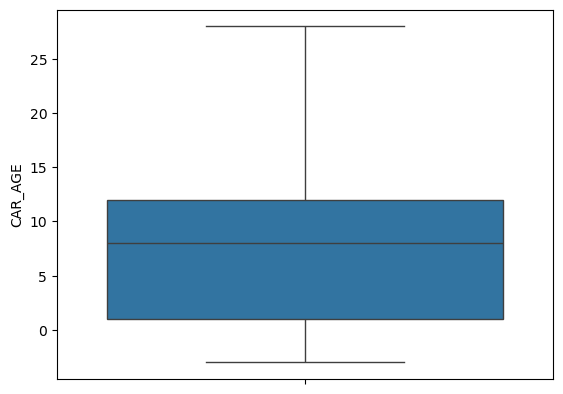

In [18]:
sns.boxplot(df['CAR_AGE'])

([<matplotlib.axis.XTick at 0x29b804ccc50>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

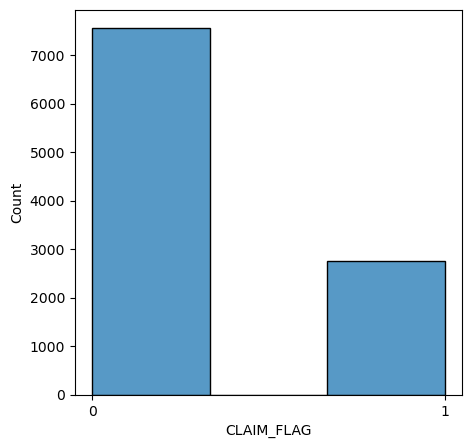

In [19]:
plt.figure(figsize=(5,5))
sns.histplot(df['CLAIM_FLAG'], bins=3)
plt.xticks(range(0,2,1))

In [20]:
df['EDUCATION'].unique()

array(['PhD', 'High School', 'Bachelors', 'Masters'], dtype=object)

In [21]:
df['EDUCATION'].value_counts()

EDUCATION
High School    4467
Bachelors      2823
Masters        2078
PhD             934
Name: count, dtype: int64

In [22]:
df['OCCUPATION'].unique()

array(['Professional', 'Blue Collar', 'Manager', 'Clerical', 'Doctor',
       'Lawyer', nan, 'Home Maker', 'Student'], dtype=object)

In [23]:
df['OCCUPATION'].value_counts()

OCCUPATION
Blue Collar     2288
Clerical        1590
Professional    1408
Manager         1257
Lawyer          1031
Student          899
Home Maker       843
Doctor           321
Name: count, dtype: int64

## Creating Data processing and model pipeline

In [24]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train , X_test , y_train , y_test = train_test_split(X , y, test_size=0.2 , stratify=y , random_state=0)

# Define preprocessing steps for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
nominal_categorical_features = categorical_features[[0,1,2,5]]
ordinal_categorical_features = categorical_features[[3,4]]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

nominal_categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories = [['PhD','Masters','Bachelors','High School'],
                                             ['Doctor','Lawyer','Professional','Manager','Clerical',
                                              'Home Maker','Blue Collar','Student']]))
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat_nominal', nominal_categorical_transformer, nominal_categorical_features),
        ('cat_ordinal', ordinal_categorical_transformer, ordinal_categorical_features)
    ])

# Define the pipeline with SMOTE and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='minority' , random_state=1)),  # Applying SMOTE
    ('classifier', XGBClassifier(learning_rate=0.5,
                     max_depth=5,
                     n_estimators=5000,
                     subsample=0.5,
                     colsample_bytree=0.5,
                     eval_metric='auc',
                     verbocity=1,
                     n_jobs=-1,
                     tree_method='hist',
                     early_stopping_rounds=10
                     ))
])


In [25]:
pipeline.fit(X_train , y_train , classifier__eval_set = [(preprocessor.fit_transform(X_test) , y_test)])

[0]	validation_0-auc:0.66134
[1]	validation_0-auc:0.68078
[2]	validation_0-auc:0.69651
[3]	validation_0-auc:0.70700
[4]	validation_0-auc:0.69110
[5]	validation_0-auc:0.70392
[6]	validation_0-auc:0.70040
[7]	validation_0-auc:0.70270
[8]	validation_0-auc:0.69636
[9]	validation_0-auc:0.70429
[10]	validation_0-auc:0.71182
[11]	validation_0-auc:0.71411
[12]	validation_0-auc:0.71485
[13]	validation_0-auc:0.71259
[14]	validation_0-auc:0.70685
[15]	validation_0-auc:0.70176
[16]	validation_0-auc:0.69942
[17]	validation_0-auc:0.70767
[18]	validation_0-auc:0.70828
[19]	validation_0-auc:0.70723
[20]	validation_0-auc:0.70603
[21]	validation_0-auc:0.70782
[22]	validation_0-auc:0.71130


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['AGE', 'YOJ', 'TOTAL_KIDS', 'INCOME', 'HOME_VAL', 'TRAVTIME',
       'BLUEBOOK', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'CAR_AGE'],
      dtype='object')),
                                                 ('cat_nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImpute...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.5,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=5000, n_jobs=-1,
                               num_parallel_tree=None, random_state=None, ...))])

## Evaluating the Pre-tuning model result:
#### Confusion matrix

Text(50.722222222222214, 0.5, 'y_test')

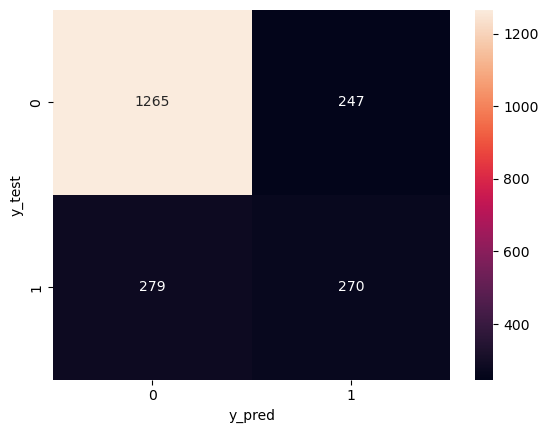

In [26]:
y_pred = pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix , classification_report, roc_auc_score
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True , fmt='0.0f')
plt.xlabel("y_pred")
plt.ylabel("y_test")

#### CLassification Report

In [27]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1512
           1       0.52      0.49      0.51       549

    accuracy                           0.74      2061
   macro avg       0.67      0.66      0.67      2061
weighted avg       0.74      0.74      0.74      2061



#### AUC score

In [28]:
y_train_pred = pipeline.predict_proba(X_train)[:,1]
y_test_pred = pipeline.predict_proba(X_test)[:,1]
print("AUC_score for training: {:0.2f}\nAUC_score for testing: {:0.2f}".format(roc_auc_score(y_train , y_train_pred),
                                                                               roc_auc_score(y_test , y_test_pred)))

AUC_score for training: 0.79
AUC_score for testing: 0.75


#### Cross Validation Score using StratifiedKFold validation technique

In [29]:
def get_score(model , X_train_cros, y_train_cros , X_test_cros , y_test_cros):
    model.fit(X_train_cros , y_train_cros , classifier__eval_set = [(preprocessor.transform(X_test_cros) , y_test_cros)])
    y_pred_proba = model.predict_proba(X_test)[:,1]
    return roc_auc_score(y_test_cros , y_pred_proba)

score_xgboost = []

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
for train_index , test_index in skf.split(X , y):
    X_train_cros, X_test_cros = X.iloc[train_index], X.iloc[test_index]
    y_train_cros, y_test_cros = y.iloc[train_index], y.iloc[test_index]
    score_xgboost.append(get_score(pipeline , X_train , y_train , X_test , y_test))

print("Accuracy across Folds:", np.mean(score_xgboost))


[0]	validation_0-auc:0.71335
[1]	validation_0-auc:0.73551
[2]	validation_0-auc:0.74424
[3]	validation_0-auc:0.74834
[4]	validation_0-auc:0.74819
[5]	validation_0-auc:0.75009
[6]	validation_0-auc:0.74805
[7]	validation_0-auc:0.74983
[8]	validation_0-auc:0.75037
[9]	validation_0-auc:0.75094
[10]	validation_0-auc:0.75108
[11]	validation_0-auc:0.75044
[12]	validation_0-auc:0.75248
[13]	validation_0-auc:0.74878
[14]	validation_0-auc:0.75203
[15]	validation_0-auc:0.75465
[16]	validation_0-auc:0.75367
[17]	validation_0-auc:0.75038
[18]	validation_0-auc:0.75231
[19]	validation_0-auc:0.75051
[20]	validation_0-auc:0.74756
[21]	validation_0-auc:0.74860
[22]	validation_0-auc:0.75336
[23]	validation_0-auc:0.75634
[24]	validation_0-auc:0.75752
[25]	validation_0-auc:0.75486
[26]	validation_0-auc:0.75616
[27]	validation_0-auc:0.75324
[28]	validation_0-auc:0.75296
[29]	validation_0-auc:0.75111
[30]	validation_0-auc:0.74773
[31]	validation_0-auc:0.74611
[32]	validation_0-auc:0.74651
[33]	validation_0-au

## Hyperparameter Tuning using GridSearchCV

In [62]:
learning_rate_list = [0.01, 0.02, 0.05, 0.1, 0.5, 1]
max_depth_list = [2, 3, 5, 6, 7, 8]
n_estimators_list = [100, 250, 500, 1000, 2000, 3000]

params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list}


X_transformed = preprocessor.transform(X_train)
oversampled_X , oversampled_y = pipeline.named_steps['smote'].fit_resample(X_transformed , y_train)


def my_roc_auc_score(model, X, y):
  y_pred_proba = model.predict_proba(X)[:,1]
  return roc_auc_score(y, y_pred_proba)

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=XGBClassifier(subsample=0.5,
                                            colsample_bytree=0.5,
                                            eval_metric='auc',
                                            verbocity=1,
                                            n_jobs=-1,
                                            tree_method='hist',
                                            early_stopping_rounds=10
                                           ),
                    param_grid=params_dict,
                    cv=10,
                    scoring=my_roc_auc_score,
                    return_train_score=True,
                    verbose=4)

grid.fit(oversampled_X , oversampled_y , eval_set = [(preprocessor.fit_transform(X_test) , y_test)])

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
[0]	validation_0-auc:0.69899
[1]	validation_0-auc:0.69036
[2]	validation_0-auc:0.71549
[3]	validation_0-auc:0.70475
[4]	validation_0-auc:0.67897
[5]	validation_0-auc:0.70013
[6]	validation_0-auc:0.71153
[7]	validation_0-auc:0.70950
[8]	validation_0-auc:0.70823
[9]	validation_0-auc:0.71001
[10]	validation_0-auc:0.71093
[11]	validation_0-auc:0.71087
[CV 1/10] END learning_rate=0.01, max_depth=2, n_estimators=100;, score=(train=0.740, test=0.681) total time=   0.0s
[0]	validation_0-auc:0.69623
[1]	validation_0-auc:0.69783
[2]	validation_0-auc:0.71425
[3]	validation_0-auc:0.71419
[4]	validation_0-auc:0.69211
[5]	validation_0-auc:0.71004
[6]	validation_0-auc:0.71405
[7]	validation_0-auc:0.71063
[8]	validation_0-auc:0.71013
[9]	validation_0-auc:0.71251
[10]	validation_0-auc:0.71366
[11]	validation_0-auc:0.71307
[12]	validation_0-auc:0.71478
[13]	validation_0-auc:0.71605
[14]	validation_0-auc:0.71360
[15]	validation_0-auc:0.7135

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, device=None,
                                     early_stopping_rounds=10,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.5, 1],
                         'max_depth': [2, 3, 5, 6, 7, 8],
                         'n_estimators': [100, 250, 500, 1000, 2000, 3000]},
             return_train_score=True,
             scoring=<function my_roc_auc_score at 0x0000025D4D3DEAC0>,
             verbose=4)

#### GridSearchCV results

In [76]:
print("Best grid score:", grid.best_score_)
print("Best grid params:", grid.best_params_)

Best grid score: 0.8951778942746096
Best grid params: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}


In [77]:
df_cv_results = pd.DataFrame(grid.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                               'param_learning_rate', 'param_max_depth', 'param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators
143,1,0.895178,0.947996,0.1,8,3000
142,1,0.895178,0.947996,0.1,8,2000
141,1,0.895178,0.947996,0.1,8,1000
140,1,0.895178,0.947996,0.1,8,500
139,1,0.895178,0.947996,0.1,8,250
...,...,...,...,...,...,...
2,211,0.744286,0.747039,0.01,2,500
5,211,0.744286,0.747039,0.01,2,3000
4,211,0.744286,0.747039,0.01,2,2000
3,211,0.744286,0.747039,0.01,2,1000


In [78]:
df_cv_results.sort_values(by='param_n_estimators')

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators
0,211,0.744286,0.747039,0.01,2,100
108,163,0.818709,0.799587,0.1,2,100
30,37,0.875654,0.912937,0.01,8,100
60,43,0.870291,0.899295,0.02,7,100
90,49,0.865848,0.886659,0.05,6,100
...,...,...,...,...,...,...
203,157,0.822505,0.849557,1,6,3000
113,163,0.818709,0.799587,0.1,2,3000
197,169,0.809165,0.831975,1,5,3000
185,181,0.800826,0.800825,1,2,3000


#### Visually interpreting Optimal maxdepth

Text(0.5, 1.0, 'Performance wrt # of Trees and Depth')

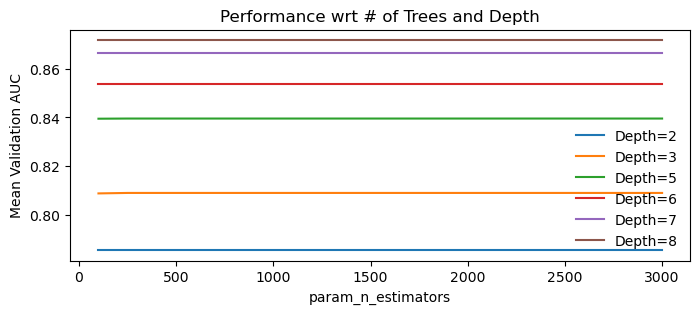

In [79]:
# First sort by number of estimators as that would be x-axis
df_cv_results_grouped = df_cv_results.groupby(['param_n_estimators', 'param_max_depth']).agg({'mean_test_score':'mean'}).reset_index()
df_cv_results_grouped.sort_values(by='param_n_estimators', inplace=True)

# Find values of AUC for different values of depth
lr_d2 = df_cv_results_grouped.loc[(df_cv_results_grouped['param_max_depth']==2)]
lr_d3 = df_cv_results_grouped.loc[(df_cv_results_grouped['param_max_depth']==3)]
lr_d5 = df_cv_results_grouped.loc[(df_cv_results_grouped['param_max_depth']==5)]
lr_d6 = df_cv_results_grouped.loc[(df_cv_results_grouped['param_max_depth']==6)]
lr_d7 = df_cv_results_grouped.loc[(df_cv_results_grouped['param_max_depth']==7)]
lr_d8 = df_cv_results_grouped.loc[(df_cv_results_grouped['param_max_depth']==8)]

# Let us plot now
fig, ax = plt.subplots(figsize=(8,3))
lr_d2.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)
lr_d3.plot(x='param_n_estimators', y='mean_test_score', label='Depth=3', ax=ax)
lr_d5.plot(x='param_n_estimators', y='mean_test_score', label='Depth=5', ax=ax)
lr_d6.plot(x='param_n_estimators', y='mean_test_score', label='Depth=6', ax=ax)
lr_d7.plot(x='param_n_estimators', y='mean_test_score', label='Depth=7', ax=ax)
lr_d8.plot(x='param_n_estimators', y='mean_test_score', label='Depth=8', ax=ax)
plt.legend(loc='lower right', prop={'size': 10}, frameon=False)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt # of Trees and Depth')

#### Visually interpreting optimal learning rate for the boosting model

Text(0.5, 1.0, 'Performance wrt learning rate')

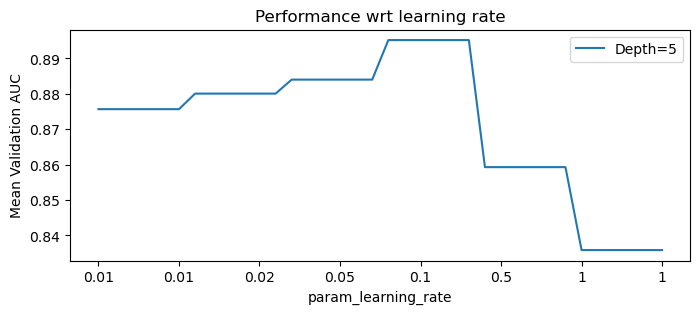

In [80]:
df_cv_results.sort_values(by='param_learning_rate', inplace=True, ascending=True)

# Find values of AUC for  across learning rate max depth = 5
lr_t3k_d2 = df_cv_results.loc[df_cv_results['param_max_depth']==8]

# Let us plot now
fig, ax = plt.subplots(figsize=(8,3))
lr_t3k_d2.plot(x='param_learning_rate', y='mean_test_score', label='Depth=5', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt learning rate')

#### Final model after GridSeach

In [34]:
# Define the pipeline with SMOTE and classifier agin with GridserchCV results
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='minority')),  # Applying SMOTE
    ('classifier', XGBClassifier(learning_rate=0.01,
                     max_depth=6,
                     n_estimators=100,
                     subsample=0.5,
                     colsample_bytree=0.5,
                     eval_metric='auc',
                     verbocity=1,
                     n_jobs=-1,
                     tree_method='hist',
                     early_stopping_rounds=10
                     ))
])

eval_set = [(preprocessor.fit_transform(X_train), y_train),(preprocessor.transform(X_test), y_test)]

pipeline.fit(X_train , y_train , classifier__eval_set = eval_set)

[0]	validation_0-auc:0.69871	validation_1-auc:0.71341
[1]	validation_0-auc:0.72570	validation_1-auc:0.73903
[2]	validation_0-auc:0.74528	validation_1-auc:0.74930
[3]	validation_0-auc:0.74561	validation_1-auc:0.74441
[4]	validation_0-auc:0.74082	validation_1-auc:0.73787
[5]	validation_0-auc:0.75359	validation_1-auc:0.75253
[6]	validation_0-auc:0.76024	validation_1-auc:0.75956
[7]	validation_0-auc:0.76091	validation_1-auc:0.76049
[8]	validation_0-auc:0.76120	validation_1-auc:0.76280
[9]	validation_0-auc:0.76201	validation_1-auc:0.76326
[10]	validation_0-auc:0.76176	validation_1-auc:0.76414
[11]	validation_0-auc:0.76009	validation_1-auc:0.76275
[12]	validation_0-auc:0.76361	validation_1-auc:0.76569
[13]	validation_0-auc:0.76482	validation_1-auc:0.76649
[14]	validation_0-auc:0.76510	validation_1-auc:0.76694
[15]	validation_0-auc:0.76622	validation_1-auc:0.76817
[16]	validation_0-auc:0.76528	validation_1-auc:0.76840
[17]	validation_0-auc:0.76541	validation_1-auc:0.76858
[18]	validation_0-au

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['AGE', 'YOJ', 'TOTAL_KIDS', 'INCOME', 'HOME_VAL', 'TRAVTIME',
       'BLUEBOOK', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'CAR_AGE'],
      dtype='object')),
                                                 ('cat_nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImpute...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=-1,
                               num_parallel_tree=None, random_state=None, ...))])

## Final Model Evaluation

In [35]:
y_train_pred = pipeline.predict_proba(X_train)[:,1]
y_test_pred = pipeline.predict_proba(X_test)[:,1]
print("AUC_score for training: {:0.2f}\nAUC_score for testing: {:0.2f}".format(roc_auc_score(y_train , y_train_pred),
                                                                               roc_auc_score(y_test , y_test_pred)))

AUC_score for training: 0.77
AUC_score for testing: 0.78


### Evaluation of AUC score at each iteration / boosting stage of the model on the validation datasets:

In [36]:
pipeline.named_steps['classifier'].evals_result()

{'validation_0': OrderedDict([('auc',
               [0.6987096898574465,
                0.7257040766438321,
                0.7452791575179076,
                0.7456112691423568,
                0.7408190339573216,
                0.7535948635811965,
                0.7602441374390865,
                0.7609136699554504,
                0.7611984876796377,
                0.7620114457263334,
                0.7617625502798925,
                0.7600870810234882,
                0.7636059204131017,
                0.76481955870875,
                0.7651038492716288,
                0.7662221090247907,
                0.7652786408998252,
                0.7654133682685643,
                0.7649968731803521,
                0.7645299212240264,
                0.7665640484422082,
                0.7680172438982584,
                0.768218920753196,
                0.7690037509786373,
                0.7695753821091091,
                0.7698563967409984,
                0.76932042430

#### Traing Vs Validation Data AUC Curve with increse in the number of trees

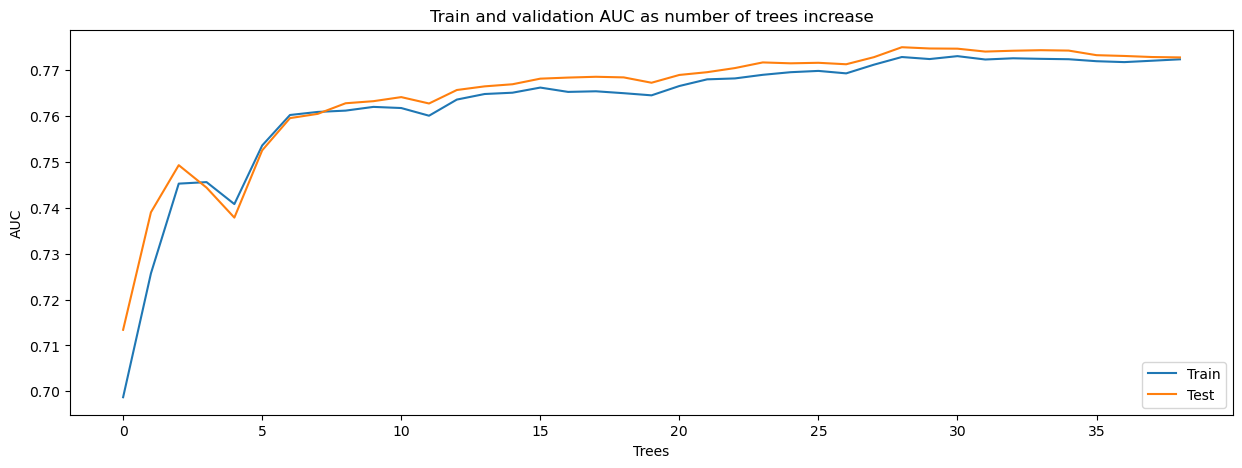

In [38]:
evaluation_results = pipeline.named_steps['classifier'].evals_result()

# Index into each key to find AUC values for training and validation data after each tree
train_auc_tree = evaluation_results['validation_0']['auc']
valid_auc_tree = evaluation_results['validation_1']['auc']


# Plotting Section
plt.figure(figsize=(15,5))

plt.plot(train_auc_tree, label='Train')
plt.plot(valid_auc_tree, label='Test')

plt.title("Train and validation AUC as number of trees increase")
plt.xlabel("Trees")
plt.ylabel("AUC")
plt.legend(loc='lower right')
plt.show()

#### Confusion matrix for the final model

<Axes: >

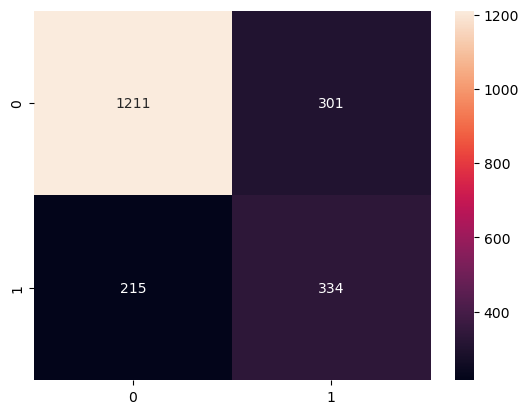

In [39]:
y_pred = pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix , classification_report, roc_auc_score
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True , fmt='0.0f')

#### Classification report for the final model

In [40]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1512
           1       0.53      0.61      0.56       549

    accuracy                           0.75      2061
   macro avg       0.69      0.70      0.69      2061
weighted avg       0.76      0.75      0.76      2061



## Designing the GRADIO app Interface and Rapid deployment

In [41]:
import gradio as gr

AGE = gr.Number(value=18 , label="Age of the Customer" , info="(Must be atleast 18)")
GENDER = gr.Dropdown(['M' , 'F'] , label="Gender")
YOJ = gr.Number(value = 2024 , label= "Year of joining")
MSTATUS = gr.Radio(['No' , 'Yes'] , label="Marrital status")
TOTAL_KIDS = gr.Number(value=0 , label="Number of Kids")
PARENT1 = gr.Radio(['No' , 'Yes'] , label="Parents alive?")
EDUCATION = gr.Dropdown(['PhD', 'High School', 'Bachelors', 'Masters'] , label = "Education Level")
OCCUPATION = gr.Dropdown(['Professional', 'Blue Collar', 'Manager', 'Clerical', 'Doctor', 'Lawyer', 'Home Maker', 'Student'] ,
                         label = "Occupation")
INCOME = gr.Number(value=0 , label="Annual Income")
HOME_VAL = gr.Number(value=0 , label="House Valuation" , info="Zero if has no house")
TRAVTIME = gr.Number(label="Daily time in minutes")
CAR_USE = gr.Radio(['Private', 'Commercial'] ,label="Car usage type", type='value')
BLUEBOOK = gr.Number(label="Vehicle Bluebook Value")
CAR_TYPE = gr.Dropdown(['Minivan', 'Van', 'SUV', 'Sports Car', 'Panel Truck', 'Pickup'] , label='Type of Vehicle')
OLDCLAIM = gr.Number(label="Amount of Old Claims")
CLM_FREQ = gr.Slider(minimum=0 , maximum=10 , label="CLaim Frequecy within last 6 months")
REVOKED = gr.Radio(['No', 'Yes'] , label="Claims Revoked")
MVR_PTS = gr.Number(label="No Claim Points")
CAR_AGE = gr.Number(label="Car Age")

def predict(AGE,GENDER,YOJ,MSTATUS,TOTAL_KIDS,PARENT1,EDUCATION,OCCUPATION,INCOME,HOME_VAL,TRAVTIME,CAR_USE,BLUEBOOK,CAR_TYPE,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE):
    input_data = pd.DataFrame([[AGE,GENDER,YOJ,MSTATUS,TOTAL_KIDS,PARENT1,EDUCATION,OCCUPATION,
                                INCOME,HOME_VAL,TRAVTIME,CAR_USE,BLUEBOOK,CAR_TYPE,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS, CAR_AGE]] ,
                              columns=['AGE','GENDER','YOJ','MSTATUS','TOTAL_KIDS','PARENT1','EDUCATION','OCCUPATION',
                                              'INCOME','HOME_VAL','TRAVTIME','CAR_USE','BLUEBOOK','CAR_TYPE', 'OLDCLAIM',
                                              'CLM_FREQ', 'REVOKED', 'MVR_PTS','CAR_AGE'])
    return ["Claim" if pipeline.predict(input_data)[0]==1 else "No CLaim"][0]

iface = gr.Interface(fn=predict , inputs = [AGE,GENDER,YOJ,MSTATUS,TOTAL_KIDS,PARENT1,EDUCATION,OCCUPATION,
                                            INCOME,HOME_VAL,TRAVTIME,CAR_USE,BLUEBOOK,CAR_TYPE,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,
                                            CAR_AGE] ,
                                            outputs = 'label')

iface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://7a3c6c5444d897a37c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
